In [15]:
import rasterio as rio
import rioxarray as rxr
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

## Univariate Analysis

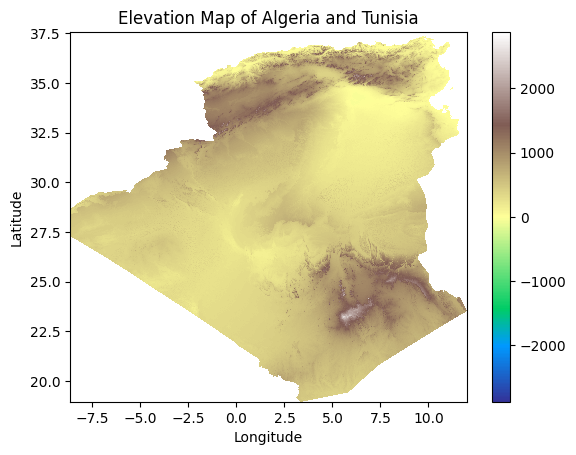

In [14]:
file_path = r"..\..\processed_data\elevation_dataset\Elevation_DZ_TN.tif"
elevation_data = rxr.open_rasterio(file_path, masked=True).squeeze()

# Créer la figure et afficher l'image
fig, ax = plt.subplots()  # carré
elevation_data.plot.imshow(ax=ax, cmap='terrain')

# Ajouter le titre et les labels
ax.set_title('Elevation Map of Algeria and Tunisia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [11]:
print(elevation_data)

<xarray.DataArray (y: 4465, x: 4960)> Size: 89MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(4465, 4960), dtype=float32)
Coordinates:
  * y            (y) float64 36kB 37.56 37.56 37.55 37.55 ... 18.97 18.96 18.96
  * x            (x) float64 40kB -8.673 -8.669 -8.665 ... 11.98 11.99 11.99
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0


In [12]:
print(elevation_data.attrs)

{'AREA_OR_POINT': 'Area', 'scale_factor': 1.0, 'add_offset': 0.0}


In [22]:
print(elevation_data.coords)

Coordinates:
  * y            (y) float64 36kB 37.56 37.56 37.55 37.55 ... 18.97 18.96 18.96
  * x            (x) float64 40kB -8.673 -8.669 -8.665 ... 11.98 11.99 11.99
    band         int64 8B 1
    spatial_ref  int64 8B 0


In [39]:
print("number of mising values:",np.isnan(elevation_data.values).sum())
missing = np.isnan(elevation_data.values).sum()
total = elevation_data.values.size
missing_percent = (missing / total) * 100
print(f"Missing percentage: {missing_percent:.2f}%")



number of mising values: 9026840
Missing percentage: 40.76%


In [36]:
non_missing = np.count_nonzero(~np.isnan(elevation_data.values))
print("Non-missing values:", non_missing)


Non-missing values: 13119560


In [46]:
print("Min:",elevation_data.min().values)
print("Max:",elevation_data.max().values)
print("Mean:",elevation_data.mean().values)
print("Median:",elevation_data.median().values)
values=elevation_data.values.flatten()
values=values[~np.isnan(values)]
mode_value=stats.mode(values, keepdims=True).mode[0]
print("mode:",mode_value)
print("std:",elevation_data.std().values)

Min: -872.0
Max: 2877.0
Mean: 538.4412
Median: 464.0
mode: 301.0
std: 324.4385


boxplot

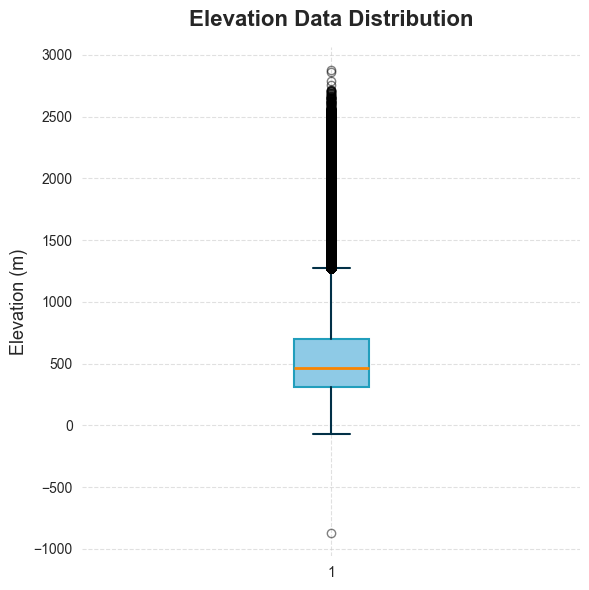

In [18]:
# --- Plot boxplot ---
# Prepare the data
values = elevation_data.values.flatten()
values = values[~np.isnan(values)]

# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(6, 6))

# Create a nicer boxplot
box = plt.boxplot(values,
                  vert=True,
                  patch_artist=True,
                  boxprops=dict(facecolor="#8ecae6", color="#219ebc", linewidth=1.5),
                  medianprops=dict(color="#fb8500", linewidth=2),
                  whiskerprops=dict(color="#023047", linewidth=1.5),
                  capprops=dict(color="#023047", linewidth=1.5),
                  flierprops=dict(marker='o', color="#ffb703", alpha=0.5))

# Add title and labels
plt.title("Elevation Data Distribution", fontsize=16, fontweight="bold", pad=15)
plt.ylabel("Elevation (m)", fontsize=13)
plt.grid(True, linestyle="--", alpha=0.6)

# Clean layout
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Histograms

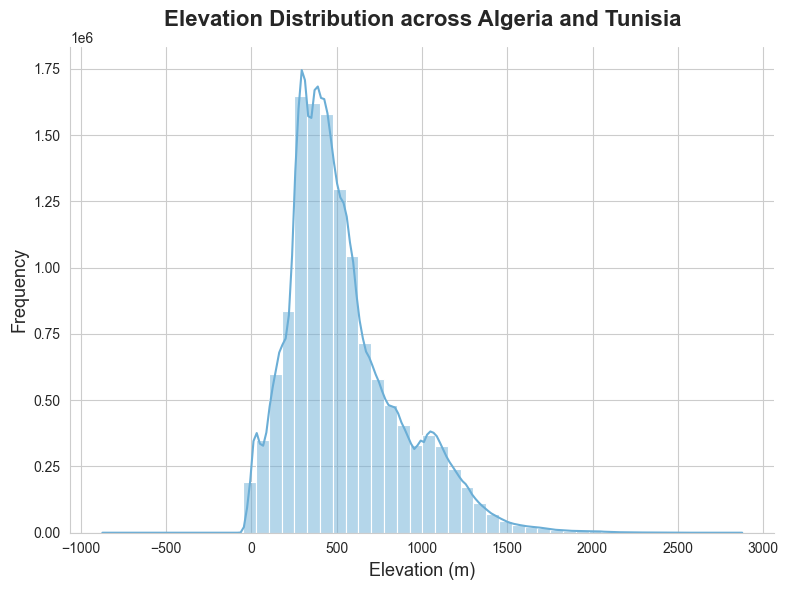

In [16]:
# Set a beautiful Seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
# Draw histogram with filled color and smooth edges
sns.histplot(elevation_data.values.flatten(), bins=50, color="#6baed6", edgecolor="white", kde=True)

# Titles and labels with better formatting
plt.title("Elevation Distribution across Algeria and Tunisia", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Elevation (m)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)

# Remove unnecessary borders and make layout clean
sns.despine()
plt.tight_layout()
plt.show()